In [294]:
import pandas as pd
import numpy as np
from scipy.io import arff
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics.cluster import rand_score
from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score ,roc_curve
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
import seaborn as sns
from sklearn.cluster import DBSCAN

In [46]:
arff_data = arff.loadarff('apascal_entire_trainvsall.arff')
data_df = pd.DataFrame(arff_data[0])

data_df

att1  att2  att3  att4  att5  att6  att7  att8  att9 att10  ... att56  \
0      b'0'  b'0'  b'0'  b'1'  b'0'  b'0'  b'0'  b'0'  b'0'  b'0'  ...  b'0'   
1      b'0'  b'0'  b'0'  b'0'  b'0'  b'1'  b'0'  b'0'  b'1'  b'1'  ...  b'1'   
2      b'0'  b'0'  b'0'  b'0'  b'0'  b'1'  b'0'  b'0'  b'1'  b'1'  ...  b'1'   
3      b'0'  b'0'  b'0'  b'0'  b'0'  b'1'  b'0'  b'0'  b'1'  b'1'  ...  b'1'   
4      b'0'  b'0'  b'0'  b'1'  b'0'  b'0'  b'0'  b'0'  b'0'  b'0'  ...  b'0'   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
12690  b'0'  b'1'  b'0'  b'0'  b'0'  b'0'  b'0'  b'0'  b'0'  b'0'  ...  b'0'   
12691  b'0'  b'0'  b'0'  b'0'  b'0'  b'1'  b'0'  b'0'  b'1'  b'0'  ...  b'1'   
12692  b'0'  b'0'  b'0'  b'0'  b'0'  b'0'  b'0'  b'0'  b'1'  b'1'  ...  b'1'   
12693  b'0'  b'0'  b'0'  b'0'  b'0'  b'1'  b'0'  b'0'  b'1'  b'1'  ...  b'1'   
12694  b'0'  b'0'  b'0'  b'0'  b'0'  b'1'  b'0'  b'0'  b'0'  b'0'  ...  b'1'   

      att57 att58 att59 att60 att61 att62 att63 att64 class  
0      b'0'  b'1'  b'0'  b'0'  b'0'  b'1'  b'0'  b'0'  b'0'  
1      b'0'  b'0'  b'0'  b'0'  b'0'  b'0'  b'0'  b'0'  b'0'  
2      b'0'  b'0'  b'0'  b'0'  b'0'  b'0'  b'0'  b'0'  b'0'  
3      b'0'  b'0'  b'0'  b'0'  b'0'  b'0'  b'0'  b'0'  b'0'  
4      b'0'  b'0'  b'0'  b'0'  b'0'  b'0'  b'1'  b'0'  b'0'  
...     ...   ...   ...   ...   ...   ...   ...   ...   ...  
12690  b'0'  b'0'  b'0'  b'0'  b'0'  b'1'  b'0'  b'0'  b'0'  
12691  b'0'  b'0'  b'0'  b'0'  b'0'  b'0'  b'0'  b'0'  b'0'  
12692  b'0'  b'0'  b'0'  b'0'  b'0'  b'0'  b'0'  b'0'  b'0'  
12693  b'0'  b'0'  b'0'  b'0'  b'0'  b'0'  b'0'  b'0'  b'0'  
12694  b'0'  b'0'  b'0'  b'0'  b'0'  b'0'  b'0'  b'0'  b'0'  

[12695 rows x 65 columns]

In [149]:

output_column='class'
anomaly_threshold=-20

In [47]:
for column in data_df.columns:
    if(data_df[column].dtype !='float64'):
        data_df[column] = data_df[column].apply(lambda col: col.decode('utf-8'))
data_df

# reference : https://medium.com/analytics-vidhya/deep-dive-in-machine-learning-with-python-b724b8d355a0
#https://www.statology.org/plot-roc-curve-python/
#https://queirozf.com/entries/add-labels-and-text-to-matplotlib-plots-annotation-examples

att1 att2 att3 att4 att5 att6 att7 att8 att9 att10  ... att56 att57  \
0        0    0    0    1    0    0    0    0    0     0  ...     0     0   
1        0    0    0    0    0    1    0    0    1     1  ...     1     0   
2        0    0    0    0    0    1    0    0    1     1  ...     1     0   
3        0    0    0    0    0    1    0    0    1     1  ...     1     0   
4        0    0    0    1    0    0    0    0    0     0  ...     0     0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...   ...   ...   
12690    0    1    0    0    0    0    0    0    0     0  ...     0     0   
12691    0    0    0    0    0    1    0    0    1     0  ...     1     0   
12692    0    0    0    0    0    0    0    0    1     1  ...     1     0   
12693    0    0    0    0    0    1    0    0    1     1  ...     1     0   
12694    0    0    0    0    0    1    0    0    0     0  ...     1     0   

      att58 att59 att60 att61 att62 att63 att64 class  
0         1     0     0     0     1     0     0     0  
1         0     0     0     0     0     0     0     0  
2         0     0     0     0     0     0     0     0  
3         0     0     0     0     0     0     0     0  
4         0     0     0     0     0     1     0     0  
...     ...   ...   ...   ...   ...   ...   ...   ...  
12690     0     0     0     0     1     0     0     0  
12691     0     0     0     0     0     0     0     0  
12692     0     0     0     0     0     0     0     0  
12693     0     0     0     0     0     0     0     0  
12694     0     0     0     0     0     0     0     0  

[12695 rows x 65 columns]

In [48]:
data_df.info

<bound method DataFrame.info of       att1 att2 att3 att4 att5 att6 att7 att8 att9 att10  ... att56 att57  \
0        0    0    0    1    0    0    0    0    0     0  ...     0     0   
1        0    0    0    0    0    1    0    0    1     1  ...     1     0   
2        0    0    0    0    0    1    0    0    1     1  ...     1     0   
3        0    0    0    0    0    1    0    0    1     1  ...     1     0   
4        0    0    0    1    0    0    0    0    0     0  ...     0     0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...   ...   ...   
12690    0    1    0    0    0    0    0    0    0     0  ...     0     0   
12691    0    0    0    0    0    1    0    0    1     0  ...     1     0   
12692    0    0    0    0    0    0    0    0    1     1  ...     1     0   
12693    0    0    0    0    0    1    0    0    1     1  ...     1     0   
12694    0    0    0    0    0    1    0    0    0     0  ...     1     0   

      att58 att59 att60 att61 att62 att63 a

In [223]:
x_data = data_df.drop(['class'],axis=1)
x_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12695 entries, 0 to 12694
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   att1    12695 non-null  object
 1   att2    12695 non-null  object
 2   att3    12695 non-null  object
 3   att4    12695 non-null  object
 4   att5    12695 non-null  object
 5   att6    12695 non-null  object
 6   att7    12695 non-null  object
 7   att8    12695 non-null  object
 8   att9    12695 non-null  object
 9   att10   12695 non-null  object
 10  att11   12695 non-null  object
 11  att12   12695 non-null  object
 12  att13   12695 non-null  object
 13  att14   12695 non-null  object
 14  att15   12695 non-null  object
 15  att16   12695 non-null  object
 16  att17   12695 non-null  object
 17  att18   12695 non-null  object
 18  att19   12695 non-null  object
 19  att20   12695 non-null  object
 20  att21   12695 non-null  object
 21  att22   12695 non-null  object
 22  att23   12695 non-null

In [225]:
x_data = x_data.astype(float)
x_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12695 entries, 0 to 12694
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   att1    12695 non-null  float64
 1   att2    12695 non-null  float64
 2   att3    12695 non-null  float64
 3   att4    12695 non-null  float64
 4   att5    12695 non-null  float64
 5   att6    12695 non-null  float64
 6   att7    12695 non-null  float64
 7   att8    12695 non-null  float64
 8   att9    12695 non-null  float64
 9   att10   12695 non-null  float64
 10  att11   12695 non-null  float64
 11  att12   12695 non-null  float64
 12  att13   12695 non-null  float64
 13  att14   12695 non-null  float64
 14  att15   12695 non-null  float64
 15  att16   12695 non-null  float64
 16  att17   12695 non-null  float64
 17  att18   12695 non-null  float64
 18  att19   12695 non-null  float64
 19  att20   12695 non-null  float64
 20  att21   12695 non-null  float64
 21  att22   12695 non-null  float64
 22

           att1      att2      att3      att4      att5      att6      att7  \
att1   1.000000 -0.107127  0.032889 -0.055711  0.067205 -0.026300 -0.076644   
att2  -0.107127  1.000000  0.022145 -0.090271  0.176201 -0.043576 -0.125335   
att3   0.032889  0.022145  1.000000 -0.026645  0.108778 -0.005395 -0.031899   
att4  -0.055711 -0.090271 -0.026645  1.000000 -0.054787 -0.117518 -0.081005   
att5   0.067205  0.176201  0.108778 -0.054787  1.000000 -0.107666 -0.062454   
...         ...       ...       ...       ...       ...       ...       ...   
att60 -0.034812 -0.056928 -0.014489 -0.036793 -0.028367 -0.013189  0.116139   
att61 -0.021260 -0.052240  0.023212  0.391450 -0.006777 -0.046914 -0.036453   
att62  0.060202  0.379687  0.049640  0.069920  0.156747 -0.040376 -0.122183   
att63 -0.047166 -0.077130 -0.019630  0.508233  0.027921 -0.075232 -0.053822   
att64  0.054190  0.056137  0.070828 -0.013331 -0.010278  0.002145 -0.014393   

           att8      att9     att10  ...     att55 

<AxesSubplot:>

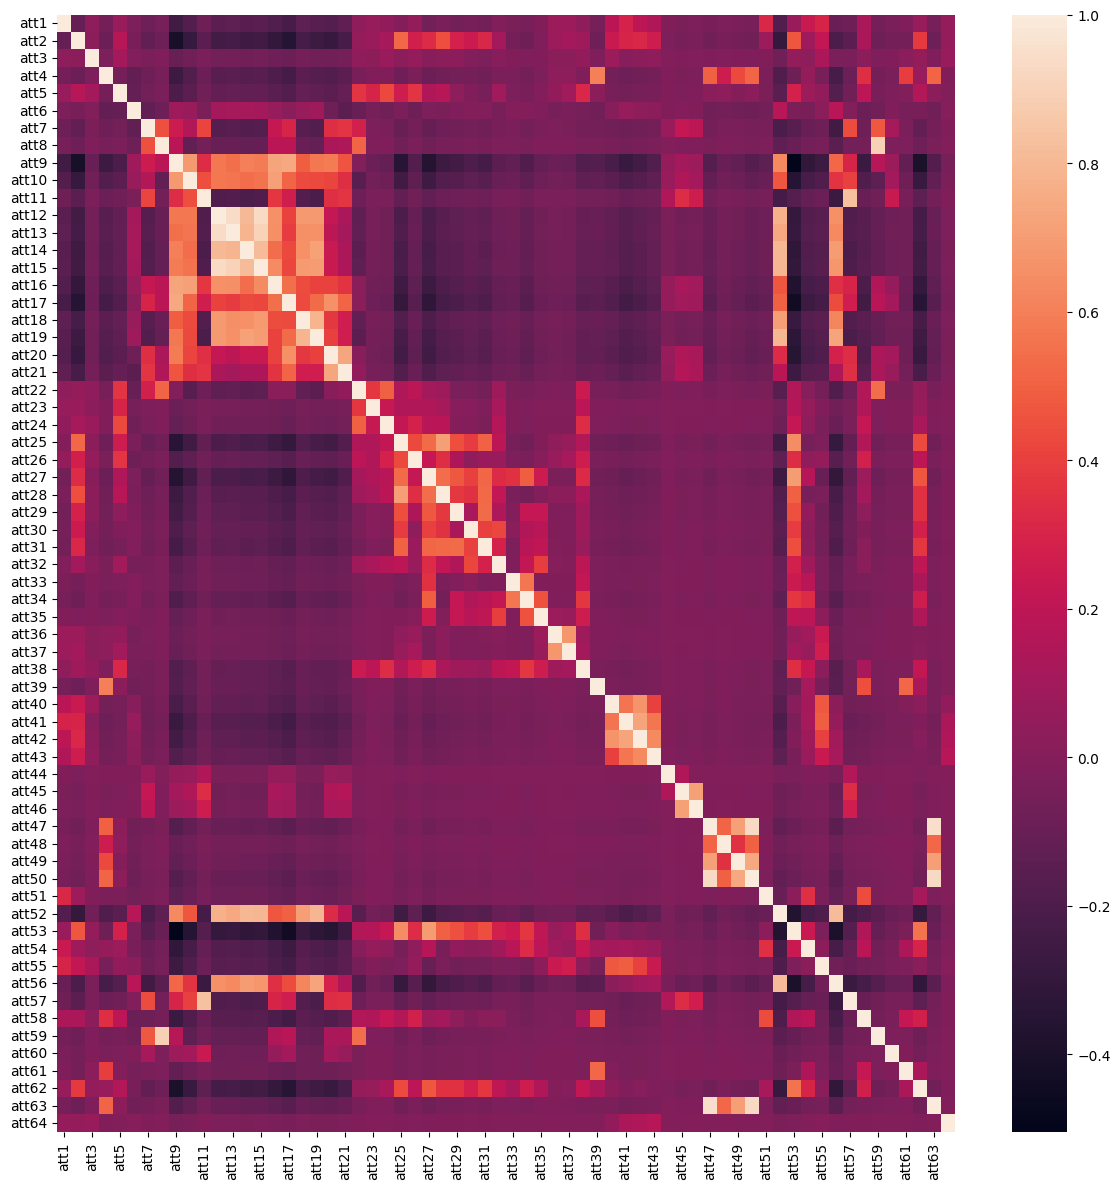

In [237]:
corr= x_data.corr()
print(corr)
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr,ax=ax)

<AxesSubplot:>

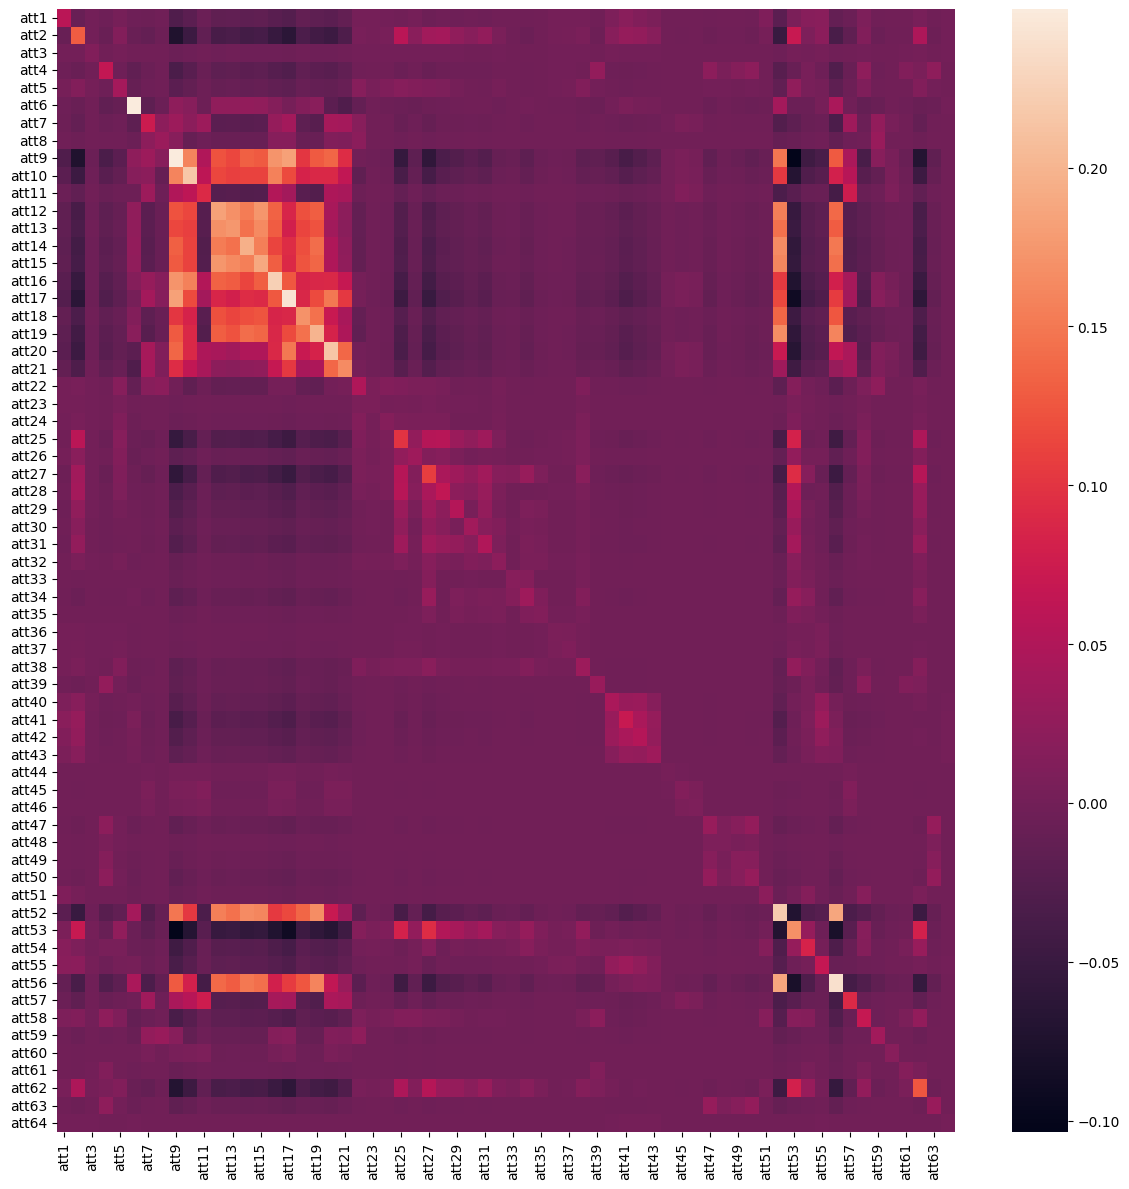

In [238]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(x_data.cov(),ax=ax)

Text(0, 0.5, 'median')

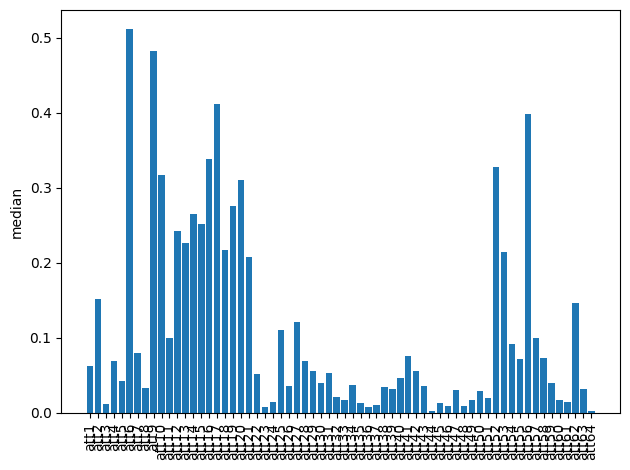

In [348]:
plt.bar(x_data.columns,x_data.mean())
plt.xticks(rotation ='vertical')
plt.ylabel('median')

Text(0, 0.5, 'variance')

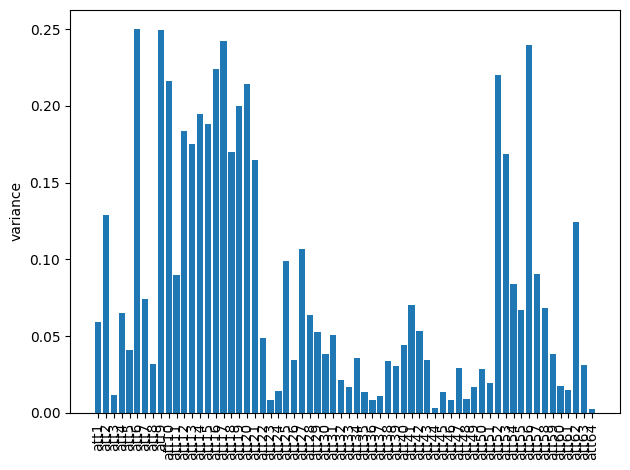

In [252]:
plt.bar(x_data.columns,x_data.var())
plt.xticks(rotation ='vertical')
plt.ylabel('variance')

In [49]:
le = preprocessing.LabelEncoder()
data_df['class']=le.fit_transform(data_df['class'])
# data_df = data_df[data_df.A3 != '?']
# print(data_df['A3'].value_counts())


In [334]:
x = data_df.drop([output_column],axis=1)
y = data_df[output_column]
X_train, X_test, y_train, y_test = train_test_split(data_df.drop([output_column],axis=1),
                                            data_df[output_column],test_size=0.2,random_state=3)



0.9917290271760536


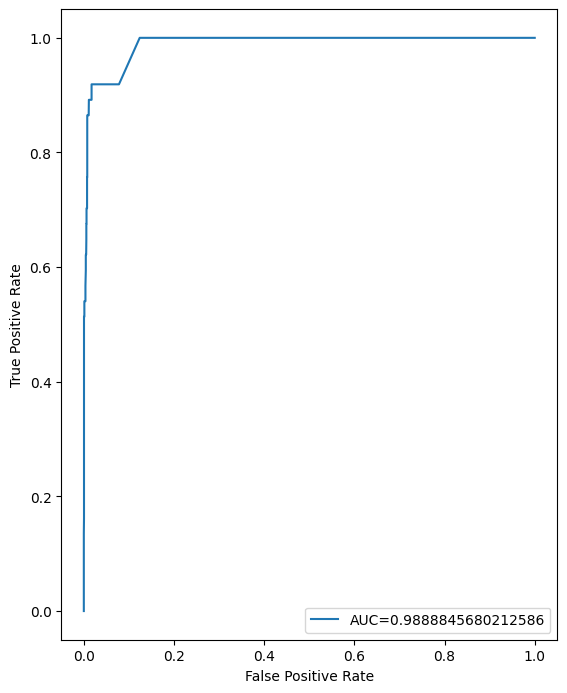

In [88]:
M1 = LogisticRegression()
M1.fit(X_train,y_train)
predictions = M1.predict(X_test)
print(accuracy_score(y_test,predictions))
y_pred_proba = M1.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.subplots_adjust(top=3)    
plt.subplot(211)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)


# BASELINE MODEL

[0.9917290271760536, 0.9917290271760536, 0.9921228830248129]


c:\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


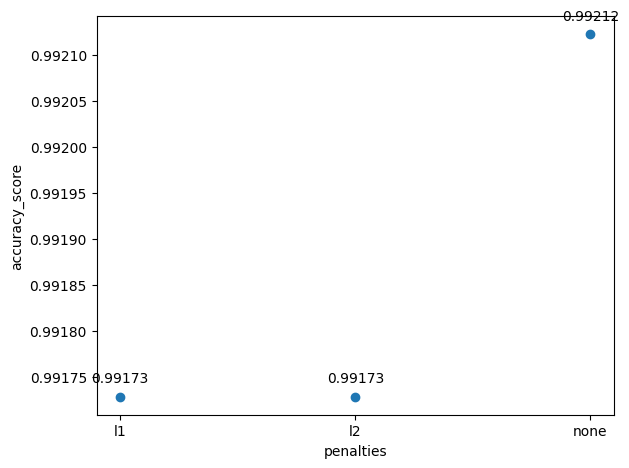

In [336]:
def baselinescores():
    penalties = ['l1','l2','none']
    accuracy_scores=[]
    for i in penalties:
        M1 = LogisticRegression(penalty=i,solver='saga',max_iter=500,n_jobs=-1)
        M1.fit(X_train,y_train)
        predictions = M1.predict(X_test)
        accuracy_scores.append((accuracy_score(y_test,predictions)))
    print(accuracy_scores)
    plt.scatter(penalties,accuracy_scores)
    plt.xlabel("penalties")
    plt.ylabel("accuracy_score")
    for x,y in  zip(penalties,accuracy_scores):
        label = "{:.5f}".format(y)
        plt.annotate(label, # this is the text
                    (x,y), # these are the coordinates to position the label
                    textcoords="offset points", # how to position the text
                    xytext=(0,10), # distance from text to points (x,y)
                    ha='center') # horizontal alignment can be left, right or center

baselinescores()


# Dimensionality Reduction based AD

In [337]:
data_df=data_df.astype(float)

x = data_df.drop([output_column],axis=1)
x.astype('float')

y = data_df[output_column]
X_train, X_test, y_train, y_test = train_test_split(data_df.drop([output_column],axis=1),
                                            data_df[output_column],test_size=0.2,random_state=3)



In [338]:
pca = PCA(n_components=2)

print("X_train before AD",X_train.shape)

print("X_test before AD",X_test.shape)

pca_x_train = pca.fit_transform(X_train)
pca_x_train = pca.inverse_transform(pca_x_train)

pca_x_test = pca.fit_transform(X_test)
pca_x_test = pca.inverse_transform(pca_x_test)

loss_train = np.sum((X_train - pca_x_train) ** 2, axis=1)
loss_test = np.sum((X_test - pca_x_test) ** 2, axis=1)

train_indexes =[]
test_indexes=[]
for i ,v in enumerate(loss_train):
    if v > 6:
        train_indexes.append(i)

for i ,v in enumerate(loss_test):
    if v > 6:
        test_indexes.append(i)

X_train.drop(X_train.index[train_indexes],inplace=True)
y_train.drop(y_train.index[train_indexes],inplace=True)

X_test.drop(X_test.index[test_indexes],inplace=True)
y_test.drop(y_test.index[test_indexes],inplace=True)

print("X_train after AD",X_train.shape)

print("X_test after AD",X_test.shape)


X_train before AD (10156, 64)
X_test before AD (2539, 64)
X_train after AD (9844, 64)
X_test after AD (2459, 64)


c:\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[0.9914599430662872, 0.9914599430662872, 0.9918666124440829]


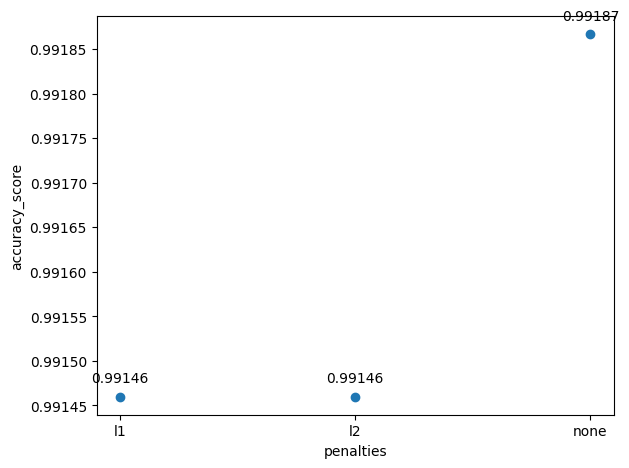

In [339]:
def baselinescores():
    penalties = ['l1','l2','none']
    accuracy_scores=[]
    for i in penalties:
        M1 = LogisticRegression(penalty=i,solver='saga',max_iter=500,n_jobs=-1)
        M1.fit(X_train,y_train)
        predictions = M1.predict(X_test)
        accuracy_scores.append((accuracy_score(y_test,predictions)))
    print(accuracy_scores)
    plt.scatter(penalties,accuracy_scores)
    plt.xlabel("penalties")
    plt.ylabel("accuracy_score")
    for x,y in  zip(penalties,accuracy_scores):
        label = "{:.5f}".format(y)
        plt.annotate(label, # this is the text
                    (x,y), # these are the coordinates to position the label
                    textcoords="offset points", # how to position the text
                    xytext=(0,10), # distance from text to points (x,y)
                    ha='center') # horizontal alignment can be left, right or center
baselinescores()


# Classification Based AD

In [344]:
x = data_df.drop([output_column],axis=1)
y = data_df[output_column]
X_train, X_test, y_train, y_test = train_test_split(data_df.drop([output_column],axis=1),
                                            data_df[output_column],test_size=0.2,random_state=3)


In [345]:
print("X_train before AD",X_train.shape)

print("X_test before AD",X_test.shape)
AD = OneClassSVM(gamma='auto',degree=6).fit(X_train)
values =AD.predict(X_train)
# print(values)
indexes=[]
for i in range(len(values)):
    if(values[i]==-1):
        indexes.append(i)
X_train.drop(X_train.index[indexes],inplace=True)
y_train.drop(y_train.index[indexes],inplace=True)


X_train before AD (10156, 64)
X_test before AD (2539, 64)


In [346]:
AD = OneClassSVM(gamma='auto',degree=6).fit(X_train)
values =AD.predict(X_test)
# print(values)
indexes=[]
for i in range(len(values)):
    if(values[i]==-1):
        indexes.append(i)
X_test.drop(X_test.index[indexes],inplace=True)
y_test.drop(y_test.index[indexes],inplace=True)

print("X_train after AD",X_train.shape)

print("X_test after AD",X_test.shape)

X_train after AD (5067, 64)
X_test after AD (630, 64)


[0.9888888888888889, 0.9888888888888889, 0.9888888888888889]


c:\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


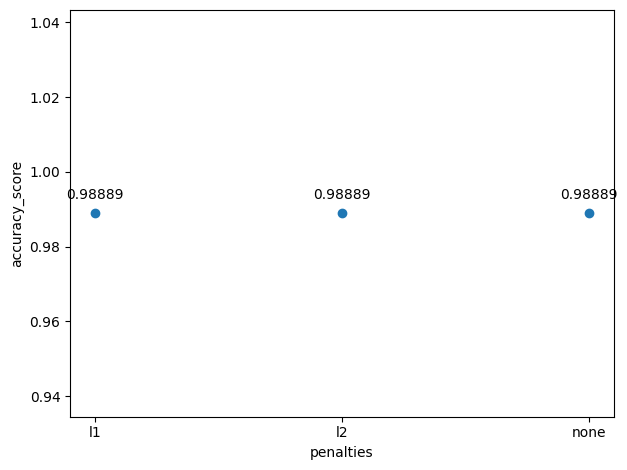

In [347]:
def baselinescores():
    penalties = ['l1','l2','none']
    accuracy_scores=[]
    for i in penalties:
        M1 = LogisticRegression(penalty=i,solver='saga',max_iter=500,n_jobs=-1)
        M1.fit(X_train,y_train)
        predictions = M1.predict(X_test)
        accuracy_scores.append((accuracy_score(y_test,predictions)))
    print(accuracy_scores)
    plt.scatter(penalties,accuracy_scores)
    plt.xlabel("penalties")
    plt.ylabel("accuracy_score")
    for x,y in  zip(penalties,accuracy_scores):
        label = "{:.5f}".format(y)
        plt.annotate(label, # this is the text
                    (x,y), # these are the coordinates to position the label
                    textcoords="offset points", # how to position the text
                    xytext=(0,10), # distance from text to points (x,y)
                    ha='center') # horizontal alignment can be left, right or center
baselinescores()

# Clustering based anomaly detection

In [340]:
x = data_df.drop([output_column],axis=1)
y = data_df[output_column]
X_train, X_test, y_train, y_test = train_test_split(data_df.drop([output_column],axis=1),
                                            data_df[output_column],test_size=0.2,random_state=3)



In [341]:
CL_train =  DBSCAN(eps=1, min_samples=30).fit_predict(X_train)
CL_test  =  DBSCAN(eps=1, min_samples=30).fit_predict(X_test)
print("X_train before AD",X_train.shape)

print("X_test before AD",X_test.shape)

train_indexes =[]
test_indexes=[]
for i ,v in enumerate(CL_train):
    if v == -1:
        train_indexes.append(i)

for i ,v in enumerate(CL_test):
    if v ==-1:
        test_indexes.append(i)

X_train.drop(X_train.index[train_indexes],inplace=True)
y_train.drop(y_train.index[train_indexes],inplace=True)

X_test.drop(X_test.index[test_indexes],inplace=True)
y_test.drop(y_test.index[test_indexes],inplace=True)


print("X_train after AD",X_train.shape)

print("X_test after AD",X_test.shape)

X_train before AD (10156, 64)
X_test before AD (2539, 64)
X_train after AD (8473, 64)
X_test after AD (1318, 64)


[0.9969650986342944, 0.9969650986342944, 0.9969650986342944]


c:\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


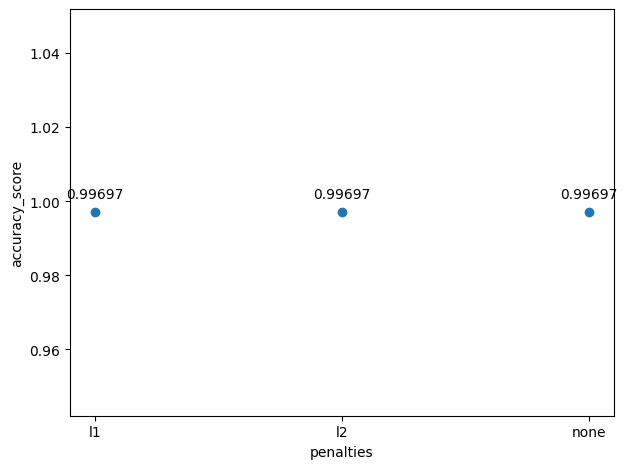

In [343]:
def baselinescores():
    penalties = ['l1','l2','none']
    accuracy_scores=[]
    for i in penalties:
        M1 = LogisticRegression(penalty=i,solver='saga',max_iter=500,n_jobs=-1)
        M1.fit(X_train,y_train)
        predictions = M1.predict(X_test)
        accuracy_scores.append((accuracy_score(y_test,predictions)))
    print(accuracy_scores)
    plt.scatter(penalties,accuracy_scores)
    plt.xlabel("penalties")
    plt.ylabel("accuracy_score")
    for x,y in  zip(penalties,accuracy_scores):
        label = "{:.5f}".format(y)
        plt.annotate(label, # this is the text
                    (x,y), # these are the coordinates to position the label
                    textcoords="offset points", # how to position the text
                    xytext=(0,10), # distance from text to points (x,y)
                    ha='center') # horizontal alignment can be left, right or center
baselinescores()